Project code for Kaggle House-Prices: Advanced Regression Techniques  
DSA Project #3 - Machine Learning    
Erin Dugan, Aug 2018  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

***SET UP PYTHON LIBRARIES:***
---------------------------

In [1]:

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from xgboost import XGBRegressor



pd.set_option('max_columns',100)  # To show 100 columns of a dataframe
%matplotlib inline 
plt.rcParams['figure.figsize'] = (30,30)   # To display larger plots

***LOAD DATA:***
-----------------
Load House Price Data from Kaggle into dataframes:

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()
df_train.shape

(1460, 81)

In [13]:
y_train = df_train[['SalePrice']]
X_train = df_train.drop(['SalePrice','Id'], axis=1)
X_test = df_test.drop(['Id'], axis=1)

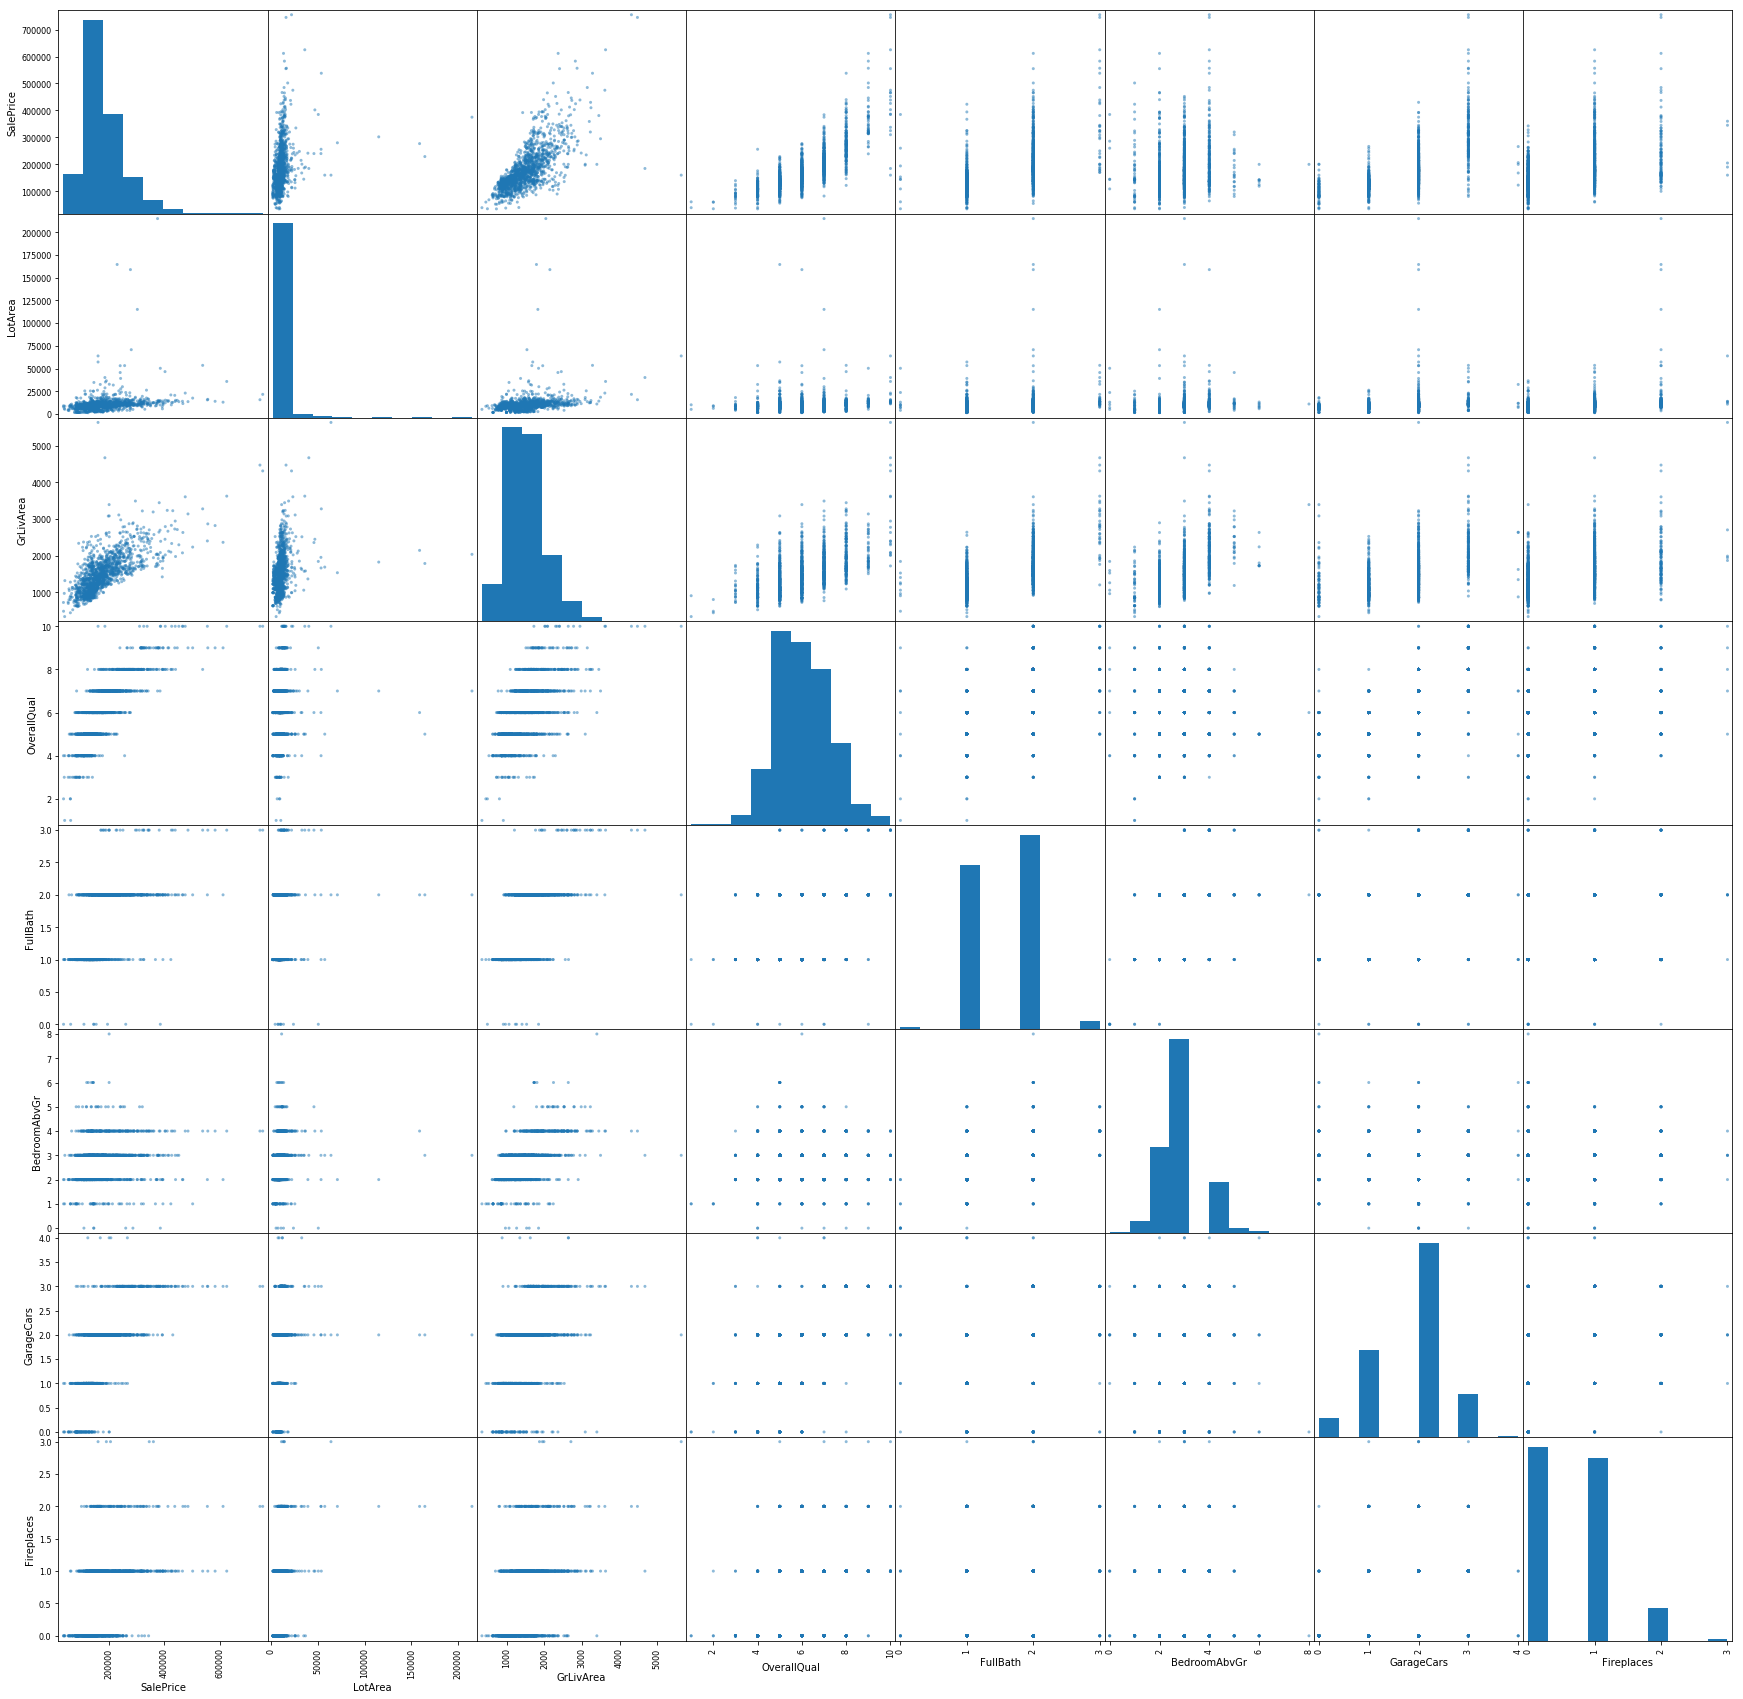

In [15]:
scatter_matrix(df_train[['SalePrice','LotArea','GrLivArea','OverallQual','FullBath','BedroomAbvGr','GarageCars',\
                        'Fireplaces']])
plt.show()

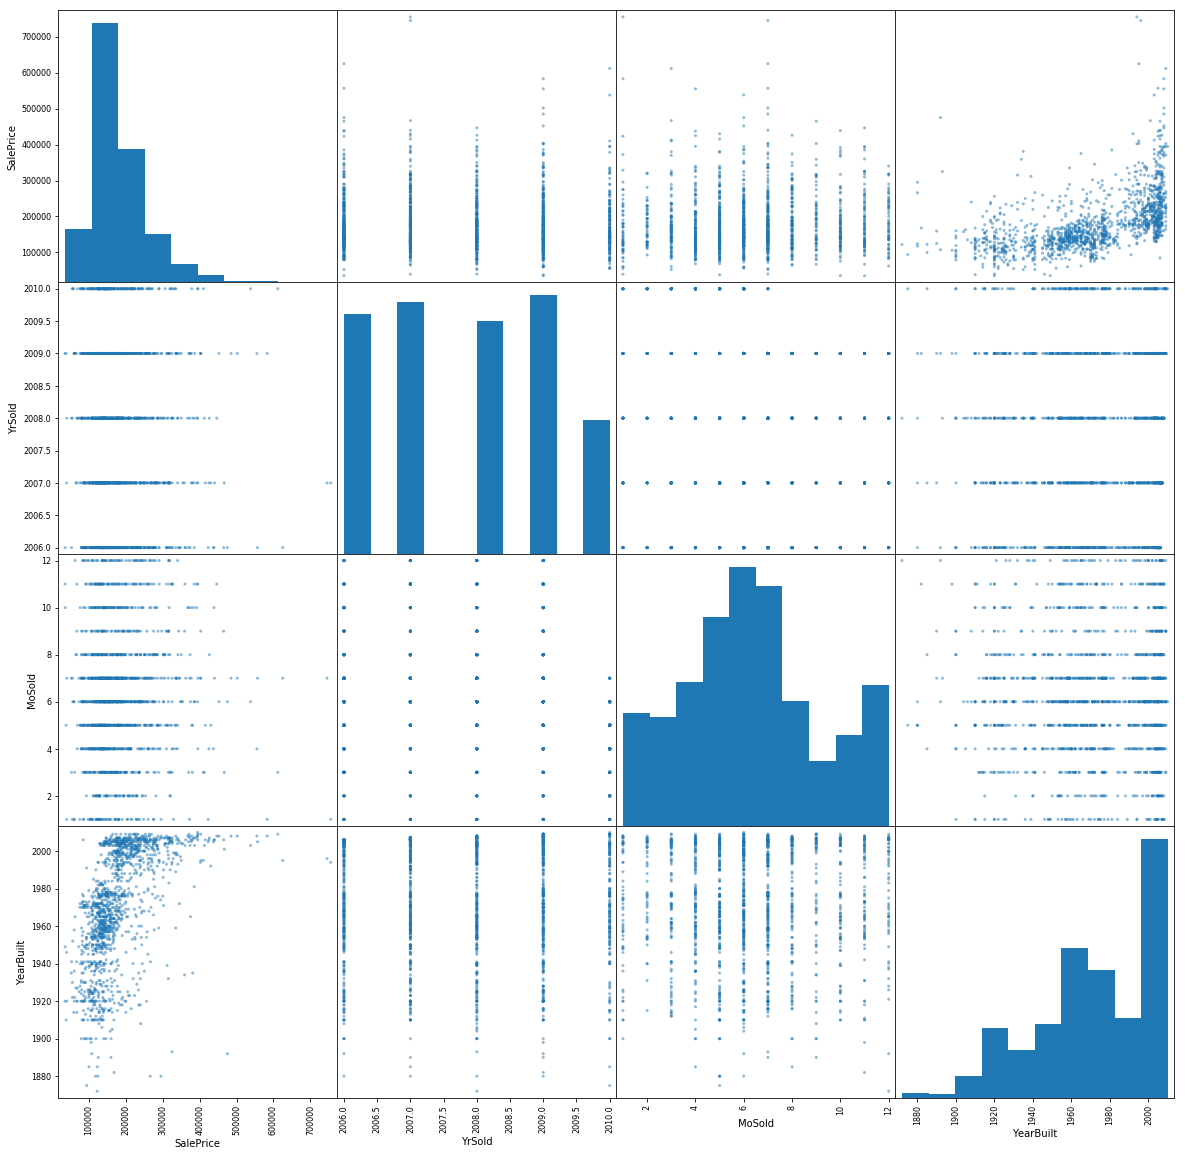

In [117]:
scatter_matrix(df_train[['SalePrice','YrSold','MoSold','YearBuilt']])
plt.show()

***DATA SUMMARY:***
--------------------------

Check both test & train data sets together:

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
all_data = pd.concat([X_train, X_test], ignore_index=True)
print(all_data.shape)
all_data.describe()

(1460, 79)
(1459, 79)
(1460, 1)
(2919, 79)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Look for NA's in data set:

In [17]:
nulls = pd.DataFrame(df_train.isnull().sum().sort_values(ascending=False)[:20])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81


Check categorical variable details:

In [18]:
categoricals = all_data.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


***DATA VISUALIZATION:***
------------------------

Graphs for categorical variables:
* Boxplots vs. SalePrice  --> to show influence on SalePrice
* Density plots vs. SalePrice (compare Neighborhoods? other categories)


Graphs for numerical variables:
1. scatter plots vs. SalePrice  --> remove outliers?
2. histograms --> check skewness (then do Box-Cox transform?)

***CLEAN DATA SET:***  
--------------------
Clean up categorical variables, remove NA's:

In [19]:
# X_train["PoolQC"] = X_train["PoolQC"].fillna("None")
# X_train["MiscFeature"] = X_train["MiscFeature"].fillna("None")
# X_train["FireplaceQu"] = X_train["FireplaceQu"].fillna("None")

for col in ('GarageFinish','GarageQual','GarageCond','PoolQC','MiscFeature','FireplaceQu','BsmtQual', \
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType', 'Alley','Fence',\
           'GarageType'):
    X_train[col] = X_train[col].fillna('None')
    
for col in ('GarageYrBlt','GarageArea','GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',\
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    X_train[col] = X_train[col].fillna(0)
    
X_train['MSZoning'] = X_train['MSZoning'].fillna(X_train['MSZoning'].mode()[0])

X_train["Functional"] = X_train["Functional"].fillna("Typ")

X_train['Electrical'] = X_train['Electrical'].fillna(X_train['Electrical'].mode()[0])
X_train['KitchenQual'] = X_train['KitchenQual'].fillna(X_train['KitchenQual'].mode()[0])
X_train['Exterior1st'] = X_train['Exterior1st'].fillna(X_train['Exterior1st'].mode()[0])
X_train['Exterior2nd'] = X_train['Exterior2nd'].fillna(X_train['Exterior2nd'].mode()[0])
X_train['SaleType'] = X_train['SaleType'].fillna(X_train['SaleType'].mode()[0])
X_train['MSSubClass'] = X_train['MSSubClass'].fillna("None")


In [20]:
#Drop features:
X_train = X_train.drop(['Utilities'], axis=1)


In [ ]:
#BsmtFinType1 & 2, FireplaceQu GarageQual,GarageCond -- > numerical

In [21]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

Impute NA's in numerical data:

In [22]:
X_train["LotFrontage"] = X_train.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))
X_train['MasVnrArea'] = X_train.MasVnrArea.fillna(0)
#Garage yr built --> NA=no garage (dropped later because of high correlation with YrBuilt)


In [23]:
Nnulls = pd.DataFrame(X_train.isnull().sum().sort_values(ascending=False)[:20])
Nnulls.columns = ['Null Count']
Nnulls.index.name = 'Feature'
Nnulls  #Verify no NA's in numeric & categorical columns


,Null Count
Feature,
SaleCondition,0
BsmtQual,0
Exterior1st,0
Exterior2nd,0
MasVnrType,0
MasVnrArea,0
ExterQual,0
ExterCond,0
Foundation,0


***FEATURE SELECTION:***
----------------------
Evaluate correlation of numerical variables:

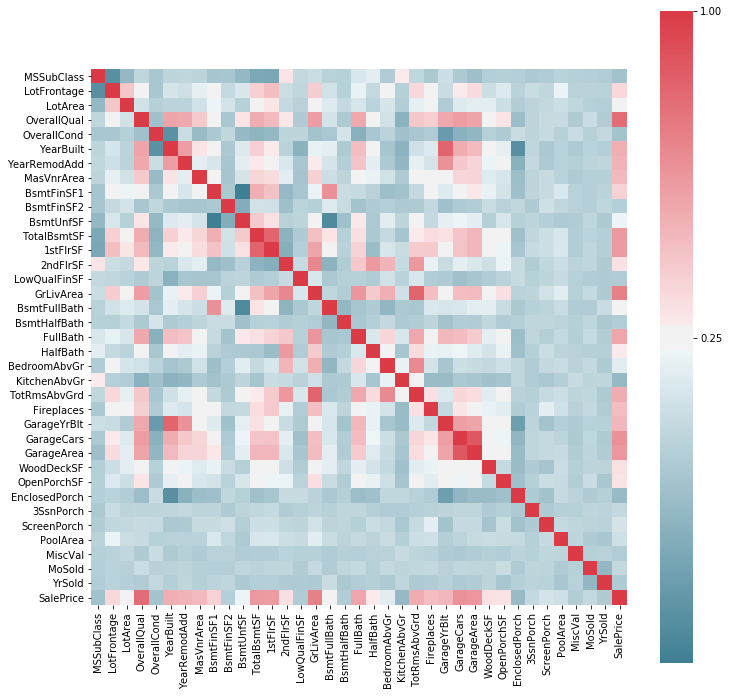

In [24]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = df_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:80].corr()
mask = np.zeros_like(corr)
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1,cmap= cmap, square=True,cbar_kws={"ticks":[0.25,1]}, mask = mask)

Heatmap shows correlations between numerical features: 
* YearBuilt & GarageYrBlt,GarageCars,GarageArea  
* OverallQual & GarageYrBlt,GarageCars,GarageArea  
* LotArea & Lot Frontage  
* GrLivArea & TotRmsAbvGrd  
* FullBath & GrLivArea  
* TotRmsAbvGrd & BedroomAbvGr  
* GarageYrBlt & Garage Cars, GarageArea  
* YearBuilt & YrRemodAdd  


  

Features' correlation with Sale Price:

In [25]:
df_train.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Convert numerical variables to categorical:

In [26]:
X_train["MoSold"] = X_train["MoSold"].astype('category')
X_test["MoSold"] = X_test["MoSold"].astype('category')

X_train["YrSold"] = X_train["MoSold"].astype('category')
X_test["YrSold"] = X_test["MoSold"].astype('category')

In [ ]:
#Fireplace, Pool, Deck, Porch -- switch to category?


***FEATURE IMPORTANCE:***
------------------------

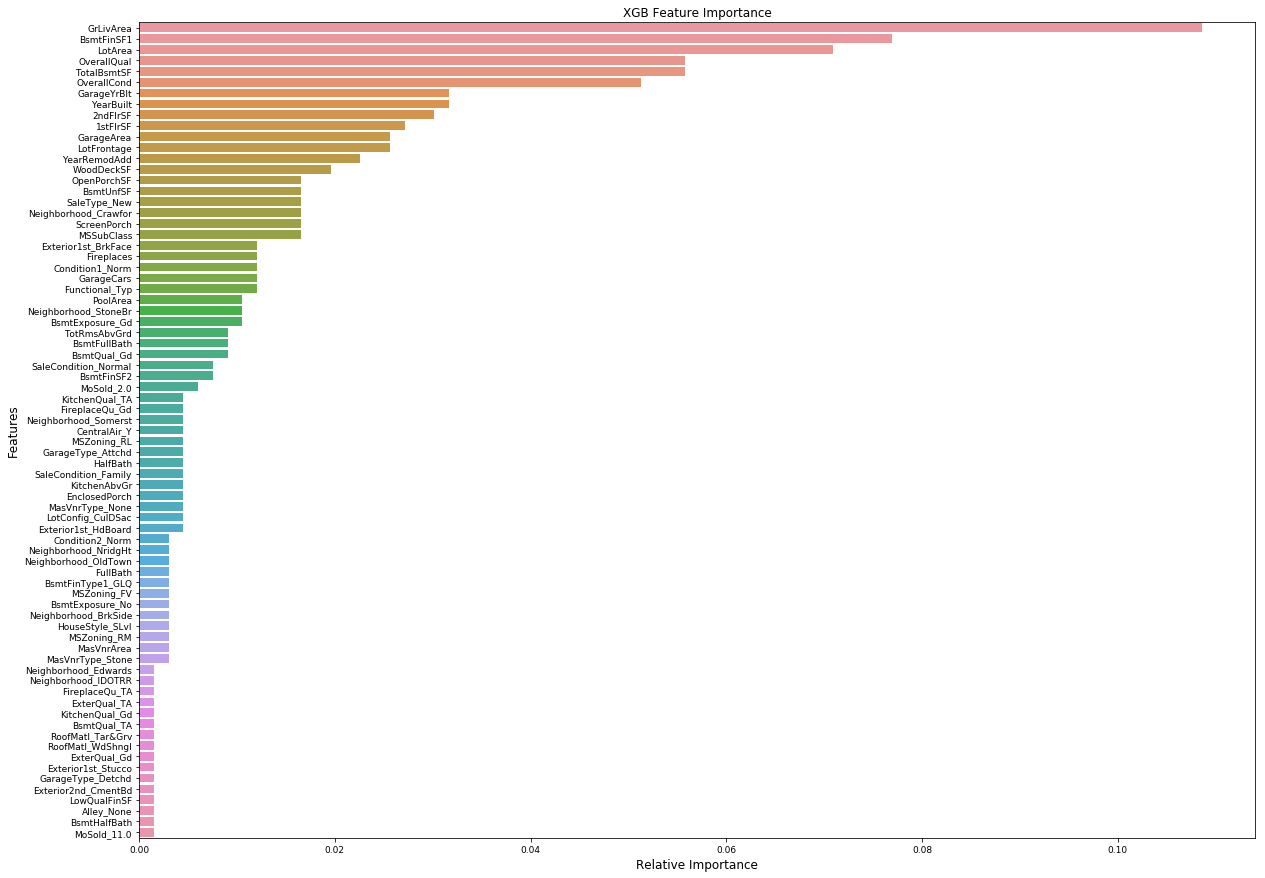

In [27]:
#Features must be numerical or boolean to test importance:

xgb_x = pd.get_dummies(X_train, drop_first=True, dummy_na=True)
#xgb_x = X_train[["LotArea","OverallQual","YearBuilt","1stFlrSF","GrLivArea","FullBath"]]

#Using XGBoost:
xgb_model = XGBRegressor()
xgb_model.fit(xgb_x, y_train, verbose=False)

# Sort feature importances from model
indices = np.argsort(xgb_model.feature_importances_)[::-1]
indices = indices[:75]  #selecting top 75

# Visualise with barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=xgb_x.columns[indices], x = xgb_model.feature_importances_[indices], orient='h')
g.set_xlabel("Relative Importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB Feature Importance");

Selected feature sets for analysis:

In [85]:
features1 = ["LotArea"]
features2 = ["LotArea","OverallQual","YearBuilt","1stFlrSF","GrLivArea","FullBath","GarageCars",\
                "MoSold","YrSold","Neighborhood","KitchenQual","Fireplaces","MasVnrArea"]


Get dummy variables for categorical features:

In [107]:
X = X_train[features1] #<-------- choose feature set

X = pd.get_dummies(X, drop_first=True, dummy_na=True)  
#                                      dummy_na=True creates NA columns for category features w/ NA

Split Kaggle (training) dataset into training & test sets (80/20):

In [92]:
seed = 0
x1_train, x1_test, y1_train, y1_test = train_test_split(X,y_train,test_size=0.20,random_state=seed)

***MACHINE LEARNING ALGORITHMS:***
---------------------------------

In [ ]:
#Linear Regression



In [ ]:
#Decision Trees



In [ ]:
#Bayesian Ridge



In [ ]:
#PCA



In [ ]:
#Lasso



In [ ]:
#GradientBoostingModel



In [ ]:
#ElasticNet



In [ ]:
#XGBoost



In [ ]:
#Random Forests



In [87]:
# From https://machinelearningmastery.com/machine-learning-in-python-step-by-step/  
# Routine to run through multiple CLASSIFICATION models with k-fold cross validation
# ... rewrite for our regression ML models



# Load libraries -- verify matches with set-up cell
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Test options and evaluation metric
seed = 0
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('TREE', DecisionTreeRegressor()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x1_train, y1_train['SalePrice'], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make predictions on validation dataset - check accuracy of best model from above
tree = DecisionTreeRegressor()
tree.fit(x1_train, y1_train['SalePrice'])
predictions = tree.predict(x1_test)
print(accuracy_score(y1_test, predictions))
print(confusion_matrix(y1_test, predictions))
print(classification_report(y1_test, predictions))

LR: 0.005136 (0.005674)
LDA: 0.013690 (0.010261)


/Users/Erin/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/Erin/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/Erin/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


KNN: 0.000862 (0.002586)


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets